In [71]:
import warnings
warnings.filterwarnings("ignore")# Ignore all warnings

In [56]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
fact_df = pd.read_csv('data/fact_table.csv', encoding='ISO-8859-1')
customer_df = pd.read_csv('data/customer_dim.csv', encoding='ISO-8859-1')
item_df = pd.read_csv('data/item_dim.csv', encoding='ISO-8859-1')
store_df = pd.read_csv('data/store_dim.csv', encoding='ISO-8859-1')
time_df = pd.read_csv('data/time_dim.csv', encoding='ISO-8859-1')

In [58]:
df = (
    fact_df.merge(time_df, how='left', on='time_key')
    .merge(item_df, how='left', on='item_key')
    .merge(customer_df, how='left', on='coustomer_key')
    .merge(store_df, how='left', on='store_key')
)

In [59]:
def group_descs(desc):
    if 'beverage' in desc.lower():
        return 'Beverage'
    elif 'food' in desc.lower():
        return 'Food'
    elif 'coffee' in desc.lower():
        return 'Coffee'
    elif 'dishware' in desc.lower():
        return 'Dishware'
    elif 'gum' in desc.lower():
        return 'Gum'
    else:
        return desc

df['item_type'] = df['desc'].apply(group_descs)

In [60]:
monthly_revenue = df.groupby(['year', 'month', 'item_type'])['total_price'].sum().reset_index()

In [61]:
monthly_revenue

,year,month,item_type,total_price
0,2014,1,Beverage,175429.75
1,2014,1,Coffee,77956.00
2,2014,1,Dishware,39354.00
3,2014,1,Food,149945.00
4,2014,1,Gum,10822.00
...,...,...,...,...
590,2021,1,Dishware,73542.00
591,2021,1,Food,270295.50
592,2021,1,Gum,20714.00
593,2021,1,Kitchen Supplies,70819.50


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [63]:
item_encoder = OneHotEncoder()
encoded_item_types = item_encoder.fit_transform(monthly_revenue[['item_type']]).toarray()
encoded_item_types_df = pd.DataFrame(encoded_item_types, columns=item_encoder.get_feature_names_out(['item_type']))

month_encoder = OneHotEncoder()
encoded_months = month_encoder.fit_transform(monthly_revenue[['month']]).toarray()
encoded_months_df = pd.DataFrame(encoded_months, columns=month_encoder.get_feature_names_out(['month']))

features = pd.concat([encoded_months_df, encoded_item_types_df], axis=1)
target = monthly_revenue['total_price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=56)

In [64]:
features

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,item_type_Beverage,item_type_Coffee,item_type_Dishware,item_type_Food,item_type_Gum,item_type_Kitchen Supplies,item_type_Medicine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
591,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
592,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
features.columns

Index(['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'item_type_Beverage', 'item_type_Coffee', 'item_type_Dishware',
       'item_type_Food', 'item_type_Gum', 'item_type_Kitchen Supplies',
       'item_type_Medicine'],
      dtype='object')

In [66]:
target

0      175429.75
1       77956.00
2       39354.00
3      149945.00
4       10822.00
         ...    
590     73542.00
591    270295.50
592     20714.00
593     70819.50
594      4744.00
Name: total_price, Length: 595, dtype: float64

# Long Short-Term Memory (LSTM) Networks
### (A specific type of RNN)

In [37]:
# LSTM

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert to numpy arrays
X = features.values
y = target.values

# Scaling the data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape data for LSTM (samples, time steps, features)
time_steps = 1
X_reshaped = X_scaled.reshape((X_scaled.shape[0], time_steps, X_scaled.shape[1]))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_scaled, test_size=0.2, random_state=42)

In [41]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
r2 = r2_score(y_test_inv, y_pred_inv)
print(f'R-squared: {r2}')

4/4 [==============================] - 0s 1ms/step - loss: 8.9013e-04
Test Loss: 0.0008901318069547415
R-squared: 0.9922867244812591


In [51]:
# Make predictions on test data
y_pred_scaled = model.predict(X_test)

# Inverse transform the predictions
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test)


# Function to predict revenue for a given month and product category
def predict_revenue(month, product_category):
    # Create input vector for the specified month and product category
    input_vector = np.zeros(X.shape[1])
    input_vector[month - 1] = 1  # Assuming months are one-hot encoded from index 0 to 11
    input_vector[12 + product_category] = 1  # Assuming product categories are one-hot encoded from index 12 onwards
    
    # Scale the input vector
    input_vector_scaled = scaler_X.transform([input_vector])
    
    # Reshape for LSTM input
    input_vector_reshaped = input_vector_scaled.reshape((1, time_steps, input_vector_scaled.shape[1]))
    
    # Predict revenue
    predicted_revenue_scaled = model.predict(input_vector_reshaped)
    predicted_revenue = scaler_y.inverse_transform(predicted_revenue_scaled)
    
    return predicted_revenue[0][0]

# Example prediction
month = 5  # Example month (May)
product_category = 2  # Example product category (adjust according to your encoding)
predicted_revenue = predict_revenue(month, product_category)
print(f'Predicted Revenue for Month {month} and Product Category {product_category}: ${predicted_revenue:.2f}')


1/1 [==============================] - 0s 18ms/step
Predicted Revenue for Month 5 and Product Category 2: $104367.32


1/1 [==============================] - 0s 17ms/step


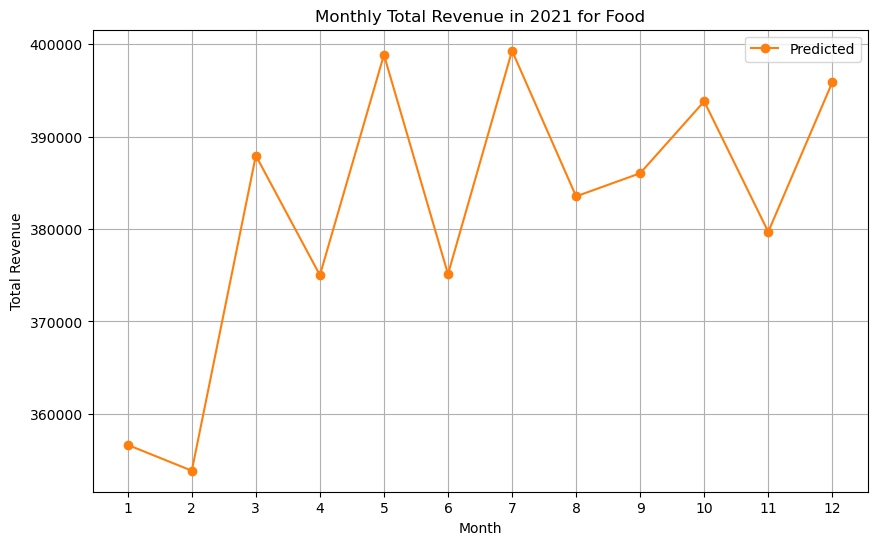

In [54]:
year = 2021
item_type = 'Food'
item_num = 3
item_monthly_revenue = monthly_revenue[(monthly_revenue['item_type'] == item_type) & (monthly_revenue['year'] == year)]
revenue_predictions = pd.DataFrame({
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
})
fig, ax = plt.subplots(figsize=(10, 6))
revenue_predictions
revenue_predictions['total_price'] = revenue_predictions['month'].apply(lambda x: predict_revenue(x, item_num))
# item_monthly_revenue.set_index('month')['total_price'].plot(kind='line', marker='o', ax=ax, label='Actual')
revenue_predictions.set_index('month')['total_price'].plot(kind='line', marker='o', ax=ax, label='Predicted', color = '#ff7f0e')
plt.title(f'Monthly Total Revenue in {year} for {item_type}')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()

# SARIMA (Seasonal ARIMA)
Note this is a linear model, not really applicable 

In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error


In [74]:
# Convert 'year' and 'month' to a datetime index
data = monthly_revenue
data['date'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))
data.set_index('date', inplace=True)

# Aggregate total_price by month for each item_type
monthly_data = data.pivot_table(index='date', columns='item_type', values='total_price', aggfunc='sum')

In [75]:
# Select one item type (e.g., 'Food')
item_type = 'Food'
series = monthly_data[item_type].dropna()

# Split the data into training and testing sets
train = series[:'2019']
test = series['2020':'2020']

# Set up the SARIMA model (you may need to experiment with these parameters)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)


/Users/yil224/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/yil224/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


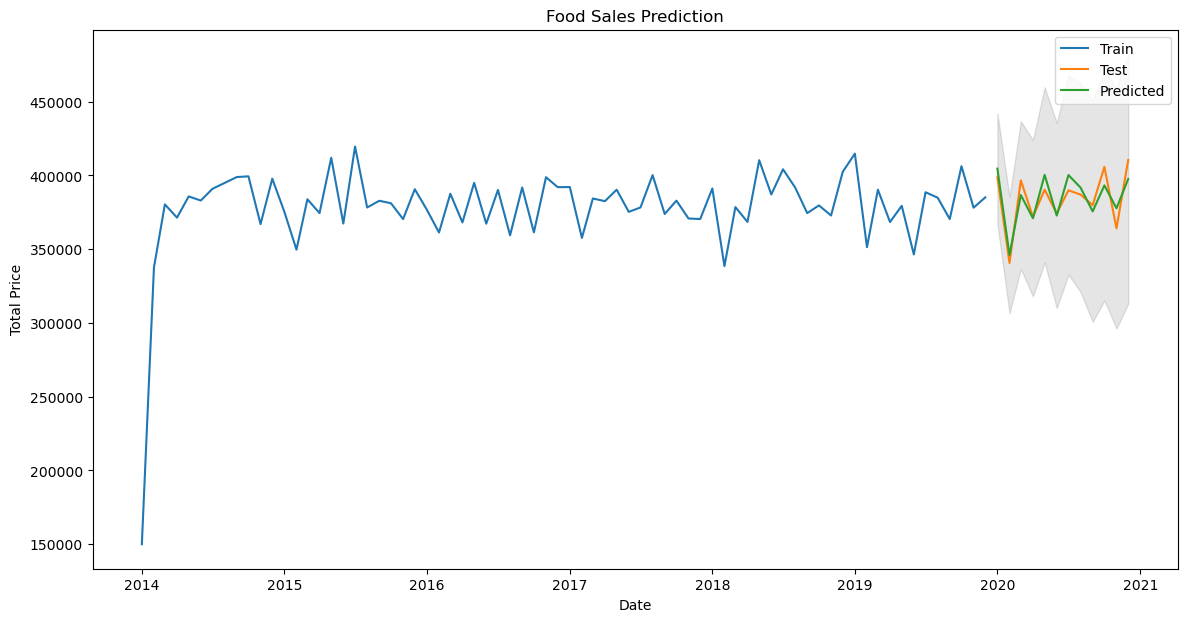

Mean Squared Error: 76928574.01458736
R-squared: 0.7787641646505642


In [40]:
# Fit the model
sarima_model = model.fit(disp=False)

# Make predictions
predictions = sarima_model.get_forecast(steps=len(test))
predicted_mean = predictions.predicted_mean
conf_int = predictions.conf_int()

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predicted_mean, label='Predicted')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='k', alpha=0.1)
plt.title(f'{item_type} Sales Prediction')
plt.xlabel('Date')
plt.ylabel('Total Price')
plt.legend()
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(test, predicted_mean)
print(f'Mean Squared Error: {mse}')

# Calculate r2
from sklearn.metrics import r2_score
r2 = r2_score(test, predicted_mean)
print(f'R-squared: {r2}')


# Random Forest Regressor

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=46)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 613076960.648993
R-squared: 0.976768477401435


# Predictions

In [69]:
def predict_revenue(new_month, new_item_type):
    encoded_new_month = month_encoder.transform([[new_month]]).toarray()
    encoded_new_item_type = item_encoder.transform([[new_item_type]]).toarray()
    encoded_new_features = np.hstack([encoded_new_month, encoded_new_item_type])
    new_features_df = pd.DataFrame(encoded_new_features, columns=list(encoded_months_df.columns) + list(encoded_item_types_df.columns))
    return model.predict(new_features_df)[0]

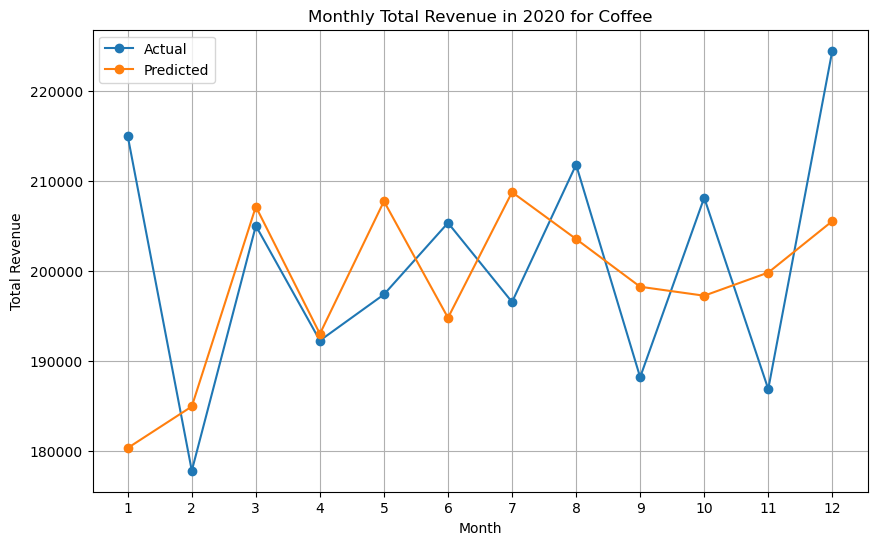

In [70]:
year = 2020
item_type = 'Coffee'
item_monthly_revenue = monthly_revenue[(monthly_revenue['item_type'] == item_type) & (monthly_revenue['year'] == year)]
revenue_predictions = pd.DataFrame({
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
})
fig, ax = plt.subplots(figsize=(10, 6))
revenue_predictions['total_price'] = revenue_predictions['month'].apply(lambda x: predict_revenue(x, item_type))
item_monthly_revenue.set_index('month')['total_price'].plot(kind='line', marker='o', ax=ax, label='Actual')
revenue_predictions.set_index('month')['total_price'].plot(kind='line', marker='o', ax=ax, label='Predicted')
plt.title(f'Monthly Total Revenue in {year} for {item_type}')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()